<a href="https://colab.research.google.com/github/doi-shigeo/KMITL-CE-Programming3/blob/main/Programming3_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib



## Introduction

Matplotlib is a useful visualization tool for graph drawing and plotting data on a plane. As you learned NumPy, you found an example of Matplotlib.

Data visualization is a good way to explain something with others, such as graph drawing in labwork. It needs several time to understand data in only a table, but graph representation is easy for readers and viewers to understand the data.

### Declaration

When importing `matplotlib` to draw a graphics, programmers often use the prefix `plt`.
`pyplot` provides "[MATLAB](https://www.mathworks.com/products/matlab.html)" like interfaces. MATLAB is a famous and popular numerical analysis tool all over the world. 
```
import matplotlib.pyplot as plt
```



In [ ]:
import matplotlib.pyplot as plt

When drawing a time series, prepare data of the series.
In the program below, `x` corrensponds to data for x axis. `y1` and `y2` correspond to data for y axis.
The size of arrays for both x and y axis must be matched. Otherwise, it will be an error.

### Example: Bar Graph

You use `plt.bar(x, y)` for drawing a bar graph. This program is an example to draw a bargraph.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

m = range(1, 13)

# declare data. the size of x must be matched the size of temperature.
x = ("JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC") 
# The data are the average temperature in Tomakomai City derived from Wikipedia
temperature = (-3.6, -3.2, 0.5, 5.3, 10.0, 14.0, 18.2, 20.4, 17.8, 11.5, 4.9, -1.2)

#plt.xticks(m, x) # set label for x axis
#plt.bar(m, temperature) # plot lines with marker

# set title and labels for axis
plt.title('Average Temp. in Tomakomai')
plt.xlabel('Month')
plt.ylabel('Average Temp.[C]')

plt.bar(x, temperature, label='Temp.') # the statement works same as the two sentences above
plt.legend(loc='upper left') # any legend must be put after plotting

plt.show()

If you make the color red if the temperature is more than 0, 
you can change the color as the following program:

The key is that:
```
colors_0 = []

for t in temperature:
  if t < 0:
    colors_0.append('blue')
  else:
    colors_0.append('red')
```

in the code, you can set a color for each bar. 
the size of colors_0 must be equal to the size of `x` and `temperature`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# declare data. the size of x must be matched the size of temperature.
x = ("JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC")
# The data are the average temperature in Tomakomai City derived from Wikipedia
temperature = (-3.6, -3.2, 0.5, 5.3, 10.0, 14.0, 18.2, 20.4, 17.8, 11.5, 4.9, -1.2)

# set title and labels for axis
plt.title('Average Temp. in Tomakomai')
plt.xlabel('Month')
plt.ylabel('Average Temp.[C]')

colors_0 = []

for t in temperature:
  if t < 0:
    colors_0.append('blue')
  else:
    colors_0.append('red')

# to confirm color for each bar
print(colors_0)
plt.bar(x, temperature, color=colors_0) 

plt.show()

### Practice: Draw a temperature graph in Bangkok
Draw a bar graph of **daily mean** temperature in a month.
Use the data: https://en.wikipedia.org/wiki/Bangkok
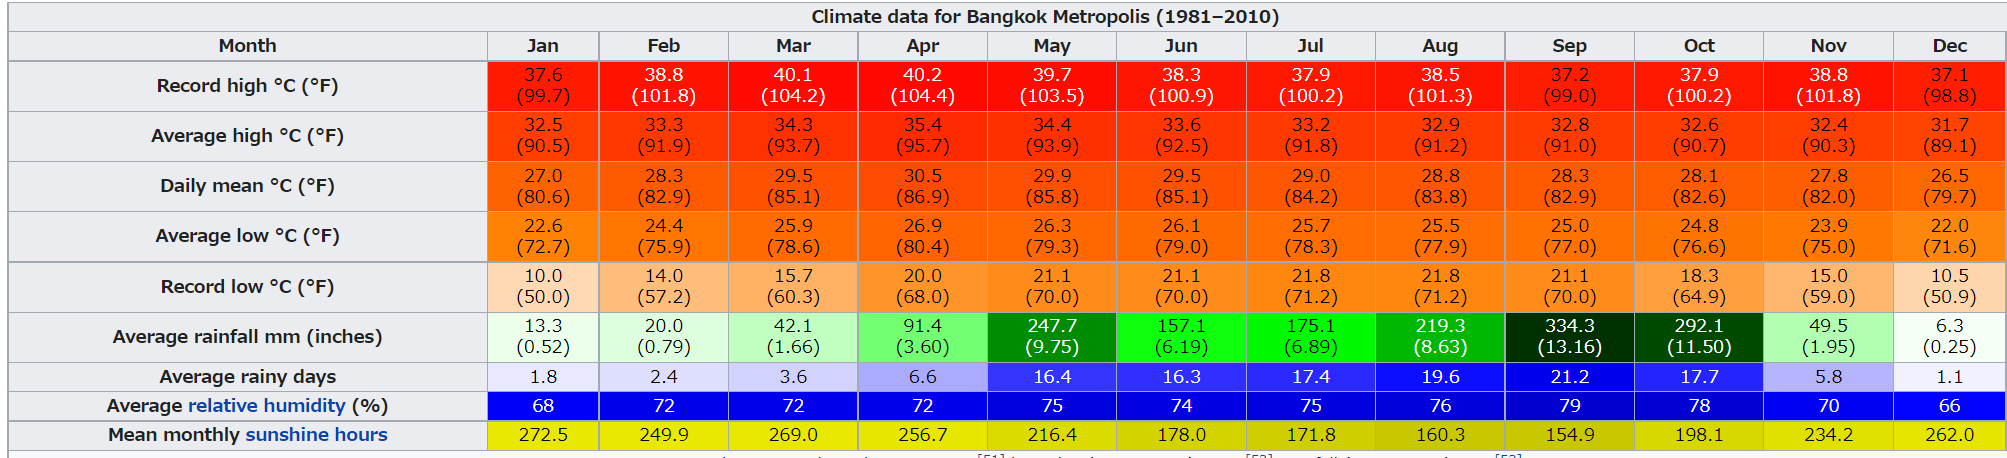

### Get data from web 

You can make a program to get data from the web.
Generally, when accessing to the internet by a web browser, The browser gets data from the web and render the data if necessary.

```
import requests

r = requests.get(URL)

```

In this section, you don't have to analyze the obtained data. 

If you are interested in dealing with data on web, BeautifulSoup is a good tool to analyze HTML and XML document.

In [ ]:
import requests

# get data of the argument of URL
r = requests.get('https://en.wikipedia.org/wiki/Bangkok')
print(r.text)


### Example: Get CSV data on the web and draw a bar graph

You can get any documents on the web.
Below is an example to get data of CSV file, which is the temperature data in Bangkok.
```
r = requests.get(URL)
```
will fetch data from URL. You must beware the data type, such as HTML, CSV and images.

https://www.data.jma.go.jp/cpd/monitor/climatview/graph_mkhtml_nrm.php?n=48455&m=1 


In [ ]:
import requests
import csv
import matplotlib.pyplot as plt

# get data of the argument of URL. In the URL below, you can get data with CSV format
r = requests.get('https://www.data.jma.go.jp/cpd/monitor/climatview/download_nrm.php?n=48455')

# preparation to convert raw CSV into arrays.
months, averages =[], []

# Convert CSV into arrays
# strip(): remove spaces at the beginning and the end of the string
# splitlines(): convert a string into a list. Each line corresponds to a list element.
for row in csv.reader(r.text.strip().splitlines()):
  # first column is the month and the second is the average temperature
  # but CSV file also contains headers, so we have to ignore them.
  try:
    months.append(int(row[0]))
    averages.append(float(row[1]))
  except ValueError:
    continue # nothing to do for the row if exception raised

# set graph 
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Average Temperature[C]")
plt.title("Average Temperature in Krungthep")
plt.bar(months, averages)

# draw a temperature 
# zip(): it returns tuples of the arguments 
for x, y in zip(months, averages):
  plt.text(x, y, str(y), ha="center", va="bottom", color="black") # the third argument is a string to draw

plt.show()


### Practice: Draw a graph of CSV data
Find data to draw a bar graph, and then draw the data.
Use the different CSV file above.


### Example: Drawing

In the program below, plot points on the x-y plane.

Please remember it will draw line when you call `plt.plot(x,y)`  and it will put points when you call `plt.plot(x,y, '.')`. Beware the third argument.  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(-180, 180, 10)
y = np.arange(-180, 180, 10)

# You can set tick for each axis. Compare with the case if two statements are commented out or not.
#plt.xticks([-180, -120, -60, 0, 60, 120, 180])
#plt.yticks([-180, -120, -60, 0, 60, 120, 180])

plt.plot(x, y, '.') # put points
plt.plot(x, y) # draw lines

plt.show()

### Example: Label

You can set a label for any axis.
You can add box, max and min.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = ("JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC")
temperature = (-3.6, -3.2, 0.5, 5.3, 10.0, 14.0, 18.2, 20.4, 17.8, 11.5, 4.9, -1.2)
max_temperature = (10.0, 9.3, 15.5, 21.8, 27.3, 30.6, 33.3, 35.5, 29.5, 24.4, 19.1, 14.8)
min_temperature = (-21.3, -20.9, -19.8, -9.8, -4.2, 1.8, 6.5, 9.2, 2.4, -5.1, -12.6, -20.4)

# plot lines with marker
plt.plot(x, temperature, marker='*', color='black', label="avg")
plt.plot(x, max_temperature, marker='*', color="red", label="max")
plt.plot(x, min_temperature, marker='*', color="blue", label="min")

plt.title("Temperature")
plt.ylabel("Degree[C]")
plt.xlabel("Month")
plt.legend(loc='upper left')
plt.show()

### Example: Sine curve

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# more simply, you can write:
x = np.arange(-180, 180, 5)
# x = np.array([i for i in range(-180, 180, 5)]) # make an NumPy array from -180 to 180 with every 5 degrees.
y1 = np.sin(x / 180 * np.pi)
y2 = np.cos(x / 180 * np.pi)

# set the range for x and y axis
# if you don't specift the limiits, matplotlib will automatically adjust it.
plt.xlim(-180,180)
plt.ylim(-1,1)

# set labels
plt.xlabel('Degree x')
plt.ylabel('sin(x)')

plt.plot(x, y1, marker='.', label='sine') # plot solid line with default color (blue) and marker '.'.
plt.plot(x, y2, color='red', linestyle='dotted', label='cosine') # plot dotted line
plt.legend(loc='upper left') # any legend must be put after plotting

plt.show()

You can draw graphs into one picture.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# more simply, you can write:
x = np.arange(-180, 180, 5)
# x = np.array([i for i in range(-180, 180, 5)]) # make an NumPy array from -180 to 180 with every 5 degrees.
y1 = np.sin(x / 180 * np.pi)
y2 = np.cos(x / 180 * np.pi)

fig, ax = plt.subplots(1, 2, sharex=False, sharey=True) # draw two graphs (one row, two column) in one picture

# set the range for x and y axis
# if you don't specift the limiits, matplotlib will automatically adjust it.
plt.xlim(-180,180)
plt.ylim(-1,1)

# set global labels
fig.suptitle('Wave')
#plt.xlabel('Degree x')
#plt.ylabel('sin(x), cos(x)')

# set labels for each graph
ax[0].set_title("Sine wave", fontsize="small")
ax[0].set_xlabel("Degree", fontsize="small")
ax[0].set_ylabel("sin(x)", fontsize="small")

ax[1].set_title("Cosine wave", fontsize="small")
ax[1].set_xlabel("Degree", fontsize="small")
ax[1].set_ylabel("cos(x)", fontsize="small")

ax[0].plot(x, y1, marker='.', label='sine') # plot solid line with default color (blue) and marker '.'.
ax[0].legend(loc='upper left') # any legend must be put after plotting
ax[1].plot(x, y2, color='red', linestyle='dotted', label='cosine') # plot dotted line
ax[1].legend(loc='upper left') # any legend must be put after plotting

plt.show()

### Practice: draw 2D graphs with matplotlib

Draw the graph of the following equations using `matplotlib`, shown in the result below.
Note: set x in increments of 0.1.

Note: you can arrange line colors, markers, line styles and so on. 
See also: [matplot.pyplot.plot() reference](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.plot.html)

(a)
$
y= \exp(x) \ \ \ \ (-1 \le x \le 1)
$

(b)
$
y=
\begin{cases}
1-x & ( -1 \le x \le 0)\\
1+x & (0 \le x \le 1) \\ 
\end{cases}
$


### 2D contour

You can draw a contour map. 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 20) # x-axis
y = np.linspace(-5, 5, 20) # y-axis 

x, y = np.meshgrid(x, y) # to make a x-y plane
z = np.cos(np.sqrt(x ** 2 + y ** 2)) # find a value of each point generated in "x,y = np.meshgrid(x, y)"

# np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)  # if you find a warning, enabling it may surpress the warning. 
fig, ax = plt.subplots(1, 2)

# drawing contour lines only
cs0 = ax[0].contour(x, y, z)

ax[0].set_title("Contour (line)", fontsize="small")
#ax[0].legend(loc="upper right")

# Filling color
ax[1].contourf(x, y, z)
ax[1].set_title("Contour (painted)", fontsize="small")
#ax[1].legend(loc="upper right")



### 3D Surface

You can draw a 3D surface.






In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 20) # x-axis
y = np.linspace(-5, 5, 20) # y-axis 

x, y = np.meshgrid(x, y) # to make a x-y plane
z = np.cos(np.sqrt(x ** 2 + y ** 2)) # find a value of each point generated in "x,y = np.meshgrid(x, y)"

# np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)  # if you find a warning, enabling it may surpress the warning. 
fig = plt.figure(figsize=(10.0, 8.0)) # set up figure
ax = fig.add_subplot(3, 2, 1, projection="3d")
ax.contour3D(x, y, z, 50, cmap="binary")
ax.set_title("Contour3D", fontsize="small")

ax = fig.add_subplot(3, 2, 2, projection="3d")
ax.plot_surface(x, y, z) # surface color: default (blue)
ax.set_title("surface", fontsize="small")
ax.view_init(50, 30) # set viewpoint 

ax = fig.add_subplot(3, 2, 3, projection="3d")
ax.plot_surface(x, y, z, color="green") # surface color: default (blue)
ax.set_title("surface green", fontsize="small")

ax = fig.add_subplot(3, 2, 4, projection="3d")
ax.plot_surface(x, y, z, cmap="viridis") # surface color: default (blue)
ax.set_title("surface viridis", fontsize="small")

ax = fig.add_subplot(3, 2, 5, projection="3d")
ax.plot_wireframe(x, y, z) # surface color: default (blue)
ax.set_title("wireframe", fontsize="small")

ax.view_init(50, 20) # set viewpoint 

plt.show()






### Practice: Draw a benchmark function for optimization in 3D

Here are the functions for benchmark of optimization algorithms. Think $x_{1}$ as x-axis and $ x_{2}$ as y-axis.
(1) is "Rastrigin" function of two dimension and (2) is "Griewank" function of two dimension.

Explanations are here:
- Rastrigin function: https://en.wikipedia.org/wiki/Rastrigin_function
- Griewank function: https://en.wikipedia.org/wiki/Griewank_function

$
(1) z = f(x_{1}, x_{2}) = 20 + \sum_{i=1}^{2}(x_{i}^{2} - \cos(2 \pi x_{i})), -5.12 \le x_{1}, x_{2} \le 5.12
$

$
(2) z = f(x_{1}, x_{2}) = 1 + \frac{1}{4000}\sum_{i=1}^{2}x_{i}^{2}- Π_{i=1}^{2} \cos(\frac{x_{i}}{\sqrt i}), -600 \le x_{1}, x_{2} \le 600
$

The optimal solution of these functions are found at $ x_1 = 0$ and $x_2 = 0 $. (Notice: you don't have to find the optimal solution by a program)



### Scatter Plot

You can plot the distribution on a 2-D plane.
By plotting a scatter plot, you can determine these two datas have a correlation or an association.

The data are about height and weight for each age in Japan in 2018, and derived from 
https://www.e-stat.go.jp/dbview?sid=0003224177 (国民健康・栄養調査, こくみんけんこう・えいようちょうさ，Survey of health and nutrition of Japan citizen)





In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# the data are derived from https://www.e-stat.go.jp/dbview?sid=0003224177
# male, age, height[cm] and weight[kg]
# attributes (age) are not used for data plotting
age    = (   1,    2,    3,     4,     5,     6,     7,     8,     9,    10,    11,    12,    13,    14,    15,    16,    17,    18,    19,    20,    21,    22,    23,    24,    25)
height = (79.7, 88.6, 96.0, 101.2, 110.0, 115.6, 122.0, 127.8, 131.8, 138.4, 145.7, 153.1, 160.3, 165.2, 168.0, 173.9, 169.2, 170.0, 174.0, 169.1, 172.5, 172.6, 169.4, 171.5, 171.5)
weight = (10.4, 12.6, 14.2,  15.4,  18.2,  20.4,  24.2,  26.6,  29.1,  33.8,  38.8,  43.4,  50.4,  51.0,  57.9,  62.6,  57.3,  61.1,  64.3,  61.4,  65.1,  64.0,  62.8,  63.9,  70.3)

plt.title('Correlation between height and weight')
plt.xlabel('Height[cm]')
plt.ylabel('Weight[kg]')
plt.scatter(height, weight)
plt.show()


#### Example: Monte Calro Simulation
Monte Carlo simulation is a technique used to investigate how a model responds to randomly generated inputs.
In this case, we use this method to find the specified area.
Consider a quarter of a circle, where the radius equals to 1.
As you already know, the area of a quarter of a circle is $ \frac{\pi}{4} $, where the radius is equal to 1.

The procedure is as follows:

(1) generate two random numbers between 0 and 1. We assume one is $ x $ and another is $ y $. 

(2) Plot the point of $(x,y)$ on a x-y plane.

(3) Determine if the point is inside of the quarter or not. You can determine by the inequality: $ x^{2} + y^{2} \le 1 $. If the point satisfies the inequality, ths point is inside of the quarter.

(4) Count how many points are produced (we assume the number is $N$) and how many point are inside of the quarter (we assume the number is $n$.

(5) find $\frac{n}{N}$ and the value is approximately equal to $\frac{\pi}{4}$.

To visualize the process of the simulation, plot all the produced point on the x-y plane. The following is the template for the purpose:

The advantage to use this method is that, the simulation can estimate the area of specified area even the area is not analytic in mathematics.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000000 # the number of points to be produced
            # Too many N consumes a lot of time

fig, ax = plt.subplots(1, 1)

inside_x, inside_y = [], []
outside_x, outside_y = [], []

n = 0 # count the number of points inside of quarter
for i in range(N):
  point = np.random.rand(1,2)[0] # point[0]: x, point[1]: y
  # np.random.rand(1,2) returns a value with format of [[x,y]]
  if (point[0] * point[0] + point[1] * point[1] <= 1):
    n += 1
    inside_x.append(point[0])
    inside_y.append(point[1])
    # ax.scatter(point[0], point[1], color="blue")
  else:
    outside_x.append(point[0])
    outside_y.append(point[1])
    # ax.scatter(point[0], point[1], color="red")

print("# of Inside quarter =",n)
print("The estimation of the area of a quarter =", n/N)

ax.scatter(outside_x,outside_y, color="red")  
ax.scatter(inside_x,inside_y, color="blue")  

ax.set_aspect('equal')
plt.show()


The below code has same functionality of above code, but is slower.
In this study, it is better to put it all together at the end when calling a graph drawing function(s). It's a practical skill for programmers.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 100 # the number of points to be produced
            # Too many N consumes a lot of time

fig, ax = plt.subplots(1, 1)

# inside_x, inside_y = [], []
# outside_x, outside_y = [], []

n = 0 # count the number of points inside of quarter
for i in range(N):
  point = np.random.rand(1,2)[0] # point[0]: x, point[1]: y
  # np.random.rand(1,2) returns a value with format of [[x,y]]
  if (point[0] * point[0] + point[1] * point[1] <= 1):
    n += 1
    ax.scatter(point[0], point[1], color="blue")
  else:
    ax.scatter(point[0], point[1], color="red")

print("# of Inside quarter =",n)
print("The estimation of the area of a quarter =", n/N)

ax.set_aspect('equal')
plt.show()

### Practice: Get data from the web and draw a scatter plot

Plot heights data and weight data in a scatter plot.

Make a program to satisfy the following requirements:
1.  Get CSV data by using `requests`. Raw data are available 
here: https://raw.githubusercontent.com/doi-shigeo/KMITL-CE-Programming3/main/Programming3_matplotlib_height_weight.csv

2. Then, plot the average of height and the average of weight for each age and each sex using the CSV data. 
 -  Male data are plotted in blue color and female data are plotted in red color.
 - There is no need to distinguish the age.
 - The x-axis is for height and the y-axis is for weight. 





